# Text-to-SQL Empowered by Large Language Models: A Benchmark Evaluation

* Damilola Agbolabori (dagbolabori@torontomu.ca)
* Obinna Onyema (obinna.onyema@torontomu.ca)

# Introduction:

#### Problem Description:

Text-to-SQL (Structured Query Language) is a challenging task in both natural language processing (NLP) and database communities. It involves translating natural language questions into SQL queries that can be executed on a given relational database. This task is essential for enabling non-expert users to interact with databases effectively, as it allows them to pose questions in natural language rather than requiring knowledge of SQL syntax.

#### Context of the Problem:

Traditionally, Text-to-SQL systems relied on predefined rules or query enumeration techniques to handle this task. However, with the advent of deep learning and large language models (LLMs), such as GPT (Generative Pre-trained Transformer) models, there has been a shift towards more data-driven approaches. These models can learn complex patterns and mappings between natural language questions and SQL queries, making them well-suited for Text-to-SQL tasks.

The goal of this Text-to-SQL project is to test the DAIL-SQL method. This method  uses the supervised fine-tuning text-to-SQL and prompt engineering empowered by large language models (LLMs) for generating syntactically correct SQL queries.

#### Limitation About other Approaches:

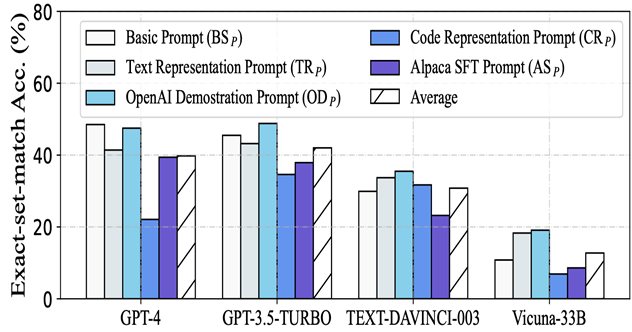

Recent advancements in LLM-based Text-to-SQL have shown promising results, with models achieving high accuracy on benchmark datasets like Spider. However, there is still room for improvement, particularly in areas such as prompt engineering, example selection, and fine-tuning of LLMs for this specific task.

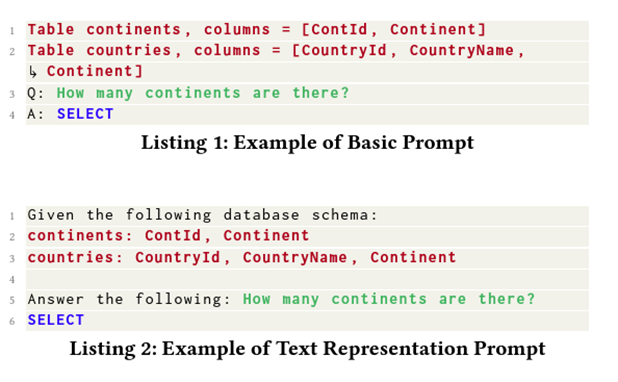

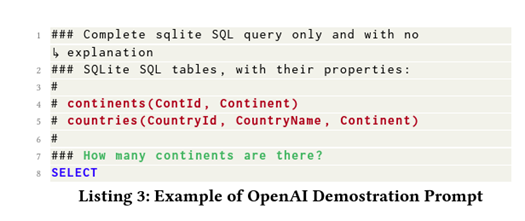

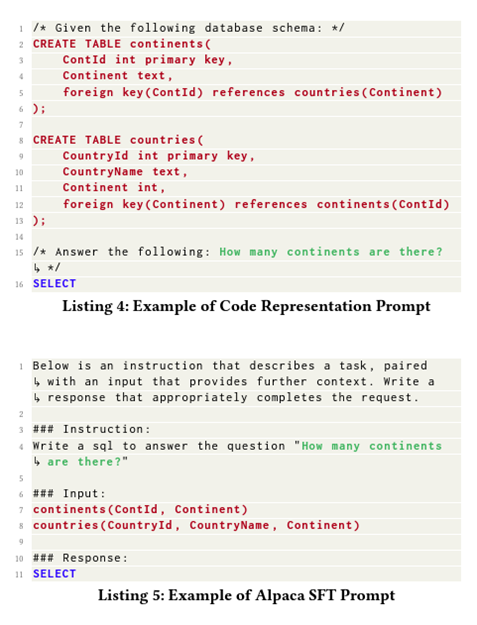

#### Solution:

In this project, we tested the GPT-4 model across two key methodologies from DAIL-SQL. This approach aims to evaluate the effectiveness of these methodologies with a consistent model, allowing for a direct comparison of their performance. The two methodologies are listed below

1. DAIL Selection (DAIL𝑆): This method selects examples based on questions and queries, aiming to enhance Text-to-SQL task execution accuracy.
2. DAIL Organization (DAIL𝑂): This method organizes examples to balance quality and quantity while preserving question-to-SQL mappings, further improving Text-to-SQL performance.

# Background

Explain the related work using the following table

| Reference |Explanation |  Dataset/Input |Weakness
| --- | --- | --- | --- |
| Yu et al. (2018) | They used a Seq2Seq model to create a tree based SQL decoder that can identify columns better as well as create nested queries| Spider dataset | Only 48% accuracy
| Wang et al. (2020) | They focused on the medical domain considering the unique structure and terminology of medical records. They introduced the Translate-Edit Model for Question-to-SQL (TREQS) generation task by first generating the targeted SQL directly then editing with both attentive-copying mechanism and a recover technique| MIMICSQL | High accuracy of 85% but small dataset of 10k records
| Dawei et al. (2023) | They focused on mplementing and refining two key methodologies from DAIL-SQL: DAIL Selection (DAIL𝑆) and DAIL Organization (DAIL𝑂). DAIL𝑆 emphasizes candidate example selection based on question and query similarity, while DAIL𝑂 focuses on efficient organization of examples while preserving question-SQL mapping. Our aim is to enhance Text-to-SQL systems by optimizing these methods for improved performance and accuracy.| Spider dataset | 86.2% 


# Methodology

The study's methodology focuses on exclusively evaluating Text-to-SQL methods using the GPT-4 model, with the Spider datasets. Spider comprises extensive instances split into training and development sets, while Spider-Realistic offers a more challenging subset. 

In this project, our primary focus was on harnessing the capabilities of the GPT-4 model to enhance Text-to-SQL performance. We tested two key methodologies, DAIL Selection (DAIL𝑆) and DAIL Organization (DAIL𝑂), tailored specifically for GPT-4. DAIL𝑆 selects examples based on questions and queries, while DAIL𝑂 organizes examples to balance quality and quantity, preserving question-to-SQL mappings. Integrated into our approach, these methodologies aim to significantly elevate Text-to-SQL task execution accuracy.



![Alternate text ](text-to-sql.png "Title of the figure, location is simply the directory of the notebook")

# Implementation

To keep it simple, we have provided bash scripts to run the python modules per task.

For best results, it's recommended to prepare the python environment with the requirements file included and run the modules in terminal.

### Activate python environment.
Instructions are in the readme. A requirements_updated.txt file contains the specific software versions for the Python 3.8 environment

If you elect to run the code in jupyter, then make sure to launch your jupyter notebook inside the conda environment. To do this, launch terminal within your project folder and run the following code to start the environment and launch jupyter notebook.

```
conda activate dail-sql
jupyter notebook
```

When the jupyter application launches, navigate to this ipynb file so you can run the rest of the code

### Prepare dataset

In this step, the Spider dataset is preprocessed.

Table schemas are enumerated and question samples from the various databases in the Spider dataset are linked to table schemas

In [ ]:
!python data_preprocess.py

### Generate questions for prediction

This process accepts configuration parameters such as 
* dataset type
* LLM for tokenization
* prompt representation
* k-shot

We have used gpt-3.5 for tokenization with max sequence length of 4096 and SQL prompt representation.
Questions are 9 shot so 9 example questions are included in the prompt to be submitted to the LLM

In [ ]:
!python generate_question.py --data_type spider --split test --tokenizer gpt-3.5-turbo --max_seq_len 4096 --prompt_repr SQL --k_shot 9 --example_type QA --selector_type  EUCDISQUESTIONMASK


### Ask LLM the Questions

This task will send prompts to the selected LLM and retrieve responses. 

We have configured responses to be stored in `prompt` folder and is written to `prompt/RESULTS_MODEL-gpt-4.txt` since we selected gpt-4 model for this experiment.

Replace `YOUR_API_KEY` with your OpenAI API key.

In [ ]:
# Predict SQL queries from LLM

!python ask_llm.py --openai_api_key YOUR_API_KEY  --model gpt-4 --question prompt

# Results

In our experiment, we use the DAIL technique which includes 9-shot prompts of SQL query examples as well as hints of the database schema.

<img src="execution_accuracy_reimplementation.png" alt="execution accuracy for our experiment" width="800" height="480" />

We achieve 95.9% on easier queries but 74.4% overall execution accuracy. Comparatively, the authors of the original paper achieved overall accuracy of 86.2%

Evaluation was done using the work of Zhong et all (available on their github repo https://github.com/taoyds/test-suite-sql-eval/tree/master). This is used as a standard for evaluating text-to-sql techniques on the Spider dataset and was used by the original authors of our paper.

We ran the code from their repo using the response file from the previous section as prediction and `src/dataset/spider/dev_gold.sql` as true labels.


To replicate, clone the repo, copy over the spider dataset into the `database` folder and execute the following from within a terminal.
However, you can use our version of the evaluation module optimized for running in the DAIL-SQL conda environment which is included in the zipped submission. You'll still need to copy over the spider dataset into the `database` folder.

```
python3.8 evaluation.py --gold ours/dev_gold.sql --pred ours/RESULTS_MODEL-gpt-4.txt --db database --etype exec --plug_value
```

We have saved the prediction and true labels in `test-suite-sql-eval/ours` folder.

# Conclusion and Future Direction

LLMs require "coaching" when they are expected to generate SQL to query an unseen database. Prompt Engineering improves performance of LLMs. The best performance comes from
* providing sample queries in the prompt to teach the LLM what is expected - (DAIL𝑆)
* providing some level of awareness of the database schema - (DAIL𝑂)



# References:

1. Vaswani, A., et al. (2017). Attention is All You Need. In Advances in Neural Information Processing Systems.

2. Zhong, V. W., Xiong, C., & Socher, R. (2017). Seq2SQL: Generating Structured Queries from Natural Language using Reinforcement Learning. In Proceedings of the 2017 Conference on Empirical Methods in Natural Language Processing (EMNLP) (pp. 1430-1440)

3. Yu, T., Zhang, Z., Gan, Z., Yu, C. Y., & Wang, J. (2018). SyntaxSQLNet: Syntax Tree Networks for Complex and Cross-Domain Text-to-SQL Task. In Proceedings of the 2018 Conference on Empirical Methods in Natural Language Processing (EMNLP) (pp. 1657-1668).

4. Wang, H., Zhang, B., Tu, Z., & Lin, J. (2020). Text-to-SQL generation for question answering on electronic medical records. arXiv preprint arXiv:2009.07307

5. Xu, K., Wang, Y., Wang, Y., Wen, Z., & Dong, Y. (2021). SeaD: End-to-end Text-to-SQL Generation with Schema-aware Denoising. arXiv preprint arXiv:2101.00451.

6. Snowflake Blog (2023). Use AI in Seconds with Snowflake Cortex, accessed from https://www.snowflake.com/blog/use-ai-snowflake-cortex/ on March 18, 2024

7. Dawei Gao, Haibin Wang, Yaliang Li, Xiuyu Sun, Yichen Qian, Bolin Ding, Jingren Zhou (2023). Text-to-SQL Empowered by Large Language Models: A Benchmark Evaluation. https://arxiv.org/abs/2308.15363